<a href="https://colab.research.google.com/github/caballeroarturo/B2-Analisis-de-Datos-con-Python-2020/blob/master/Sesion-05/Ejemplo-01/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo 1: Bootstrap

### 1. Objetivos:
    - Aprender el concepto de muestreo randomizado y su utilidad
    - Aprender el algoritmo de bootstrap paso a paso
    - Aprender a graficar distribuciones muestrales

---
    
### 2. Desarrollo:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### a) Muestreo aleatorio o randomizado

Una de las maneras en las que normalmente se evitan los sesgos a la hora de tomar muestras es a través del muestreo aleatorio o randomizado. Esto significa crear una muestra a partir de una población o de otra muestra eligiendo elementos del conjunto original aleatoriamente. Cada elemento tiene las mismas posiblidades de ser elegido para la nueva muestra, a menos que haya una buena razón para hacerlo distinto.

Con este procedimiento intentamos evitar el sesgo de selección.

In [2]:
path1 = "https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020/master/"
df = pd.read_csv(path1 + 'Datasets/diabetes-clean.csv', index_col=0)

df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Por ejemplo, vamos a tomar algunas muestras de la variable 'glucose'. Un muestreo aleatorio puede tomarse sin reposición, lo cual significa que cada vez que un elemento se toma de la muestra original, no se regresa a la muestra original. Con cada muestreo entonces nuestra muestra original se hace más pequeña, lo cual en realidad cambia las probabilidades de elegir las muestras restantes:

In [3]:
df.shape

(768, 9)

In [4]:
muestra1 = df['glucose'].sample(n=20, replace=False)   # muestra de tamaño n=20 sin reemplazo
muestra1.shape

(20,)

In [5]:
muestra1

145    102
42     106
377     87
123    132
734    105
432     80
719     97
542     90
725    112
88     136
340    130
450     82
393    116
273     71
582    121
548    164
16     118
137     93
130    173
106     96
Name: glucose, dtype: int64

In [6]:
muestra1.mean(); muestra1.std()

26.711864109614783

Tambíen podemos tomar elementos con reposición, donde regresamos cada elemento después de tomar la muestra. Esto quiere decir que en cada toma tenemos la misma probabilidad de elegir cualquiera de los elementos y además el remuestreo puede incluir elementos repetidos:

In [7]:
# Muestra del 10% de los datos (selecciona una fracción de los datos, de tamaño 10%)
df['glucose'].sample(frac=0.1, replace=True)

746    147
211    147
746    147
734    105
478    126
      ... 
567     92
12     139
167    120
123    132
364    147
Name: glucose, Length: 77, dtype: int64

### b) Bootstrap

El Bootstrap nos sirve para generar lo que se llaman distribuciones muestrales de estadísticas. Esto es un histograma de una medida estadística cuantificada utilizando un gran número de remuestreos. ¿Para qué queremos hacer esto? Para calcular la incertidumbre de nuestra medida estadística. Dado que no podemos regresar a la fuente original, vamos a crear 'nuevas muestras' a partir de la que tenemos, con el fin de simular qué pasaría si regresáramos a la fuente original a tomar más muestras. El algoritmo es el siguiente:

1. Toma un elemento de tu conjunto de datos de manera aleatoria con reposición.
2. Repite el paso 1 `n` veces (entre más grande tu `n`, más preciso tu cálculo; pero no tiene sentido que sea tan grande como el tamaño de tu muestra).
3. Toma la medida estadística que te interese de tus valores remuestreados.
4. Repite los pasos 1 a 3 `R` veces (entre mayor sea `R`, más preciso tu cálculo).
5. Utiliza las medidas obtenidas para:
  a) Generar un histograma o boxplot
  b) Calcular el error estándar
  c) Calcular un intervalo de confianza
  
Nuestro cálculo va a resultar más exacto si `n` y `R` son lo más grandes posibles. Pero el boostrapping es un proceso que toma mucho tiempo y poder computacional, así que si nuestro dataset es muy grande habrá que disminuir estos valores hasta que el procedimiento completo tome una cantidad decente de tiempo.

Vamos a realizar estos pasos y llevar a cabo el inciso *a* del paso 5:

In [8]:
df.shape

(768, 9)

In [9]:
print(100_000 == 100000)

True


In [10]:
glucose = df['glucose']

means = []
desv = []

for i in range(100_000):
    sample = glucose.sample(n=50, replace=True) # selecciona una muestra de tamaño 50
    means.append(sample.mean())
    desv.append(sample.std())

serie_means = pd.Series(means)
desv_means = pd.Series(desv)

In [11]:
# es la media de los promedios de las 100_000 muestras de tamaño 50
serie_means.mean()

120.89340319999998

In [12]:
desv_means.mean()

31.75596890311316

In [13]:
glucose.std()

31.97261819513622

In [14]:
serie_means

0        120.92
1        118.82
2        117.16
3        127.00
4        122.82
          ...  
99995    127.00
99996    117.44
99997    130.88
99998    123.58
99999    114.14
Length: 100000, dtype: float64

In [15]:
glucose.mean()

120.89453125

Media de las 100,000 muestras de tamaño 50 del conjunto de datos.

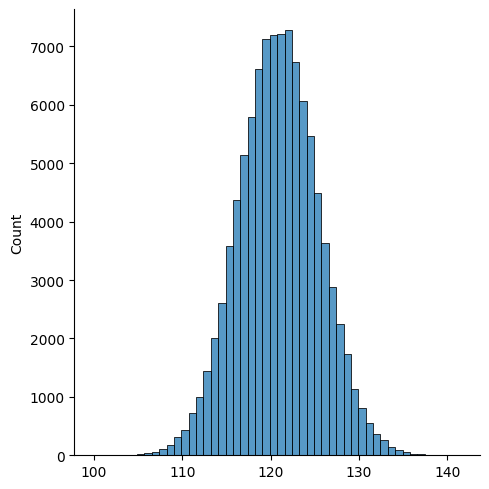

In [16]:
sns.displot(serie_means, kind="hist", bins = 50)

### c) Teorema del límite central

Existe un teorema matemático llamado Teorema del Limíte Central que establece que las distribuciones muestrales de estadísticas van a tender hacia la normalidad. Ésta no es una regla absoluta, pero se cumple en muchos casos. En nuestro ejemplo podemos calcular qué tan cerca de la normalidad están nuestros promedios muestrales:

In [17]:
#asimetría; positiva es sesgada a la derecha y negativa a la izquierda.
serie_means.skew()

0.025250698209941764

In [18]:
serie_means.kurtosis()

0.034736632731514394

Como puedes ver, en este caso se cumple con mucha precisión. Entre más pequeñas sean nuestras remuestras, normalmente la curtosis aumenta.

Vamos a preguntarnos:

1. ¿Por qué creen que la curtosis aumente si nuestras remuestras son más pequeñas?
2. ¿Por qué la teoría del límite central suele cumplirse?
3. ¿Qué significa que la distribución muestral de una medida estadística **no** sea normal? ¿Cómo podemos interpretar ese fenómeno?